# Modelos de Resposta Qualitativa

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo

* Modelos de Resposta Qualitativa
  * Modelo de resposta binária
    * Modelo de Probabilidade Linear
    * Modelo Logit
    * Pseudo-R² (McFadden)
    * Modelo Probit
    * Qual escolher? Logit ou Probit?
  * Modelos de resposta multinomial
    * Modelo Multinomial
      * Modelo Multinomial probit/logit
    * Modelo Ordenado
      * Modelo Ordenado probit/logit
* Considerações



---

## Modelos de Resposta Qualitativa

Modelos de Resposta Qualitativa são usados em econometria para modelar situações em que a variável dependente é qualitativa, ou seja, assume valores discretos. Esses modelos são amplamente aplicados em diversas áreas, como estudos de satisfação do cliente, qualidade de produtos, opinião pública, marketing, saúde, etc. Eles são particularmente úteis quando queremos entender como variáveis independentes ($X$) influenciam a **probabilidade de ocorrência** de um determinado evento representado pela variável dependente ($Y$).

### Tipos de Resposta Qualitativa

1. **Resposta Binária (0 ou 1):** A variável dependente assume dois valores, indicando a presença ou ausência de uma característica. Exemplo: Sucesso (1) ou Falha (0), Sim (1) ou Não (0).
2. **Resposta Multinomial:** A variável dependente pode assumir mais de dois valores discretos. Exemplo: A satisfação com um produto pode ser categorizada como Ruim (1), Regular (2), ou Boa (3).

### Modelo de Resposta Binária

Quando a variável dependente assume apenas dois valores, como $1$ ou $0$, chamamos isso de **variável binária** ou **dummy**. O modelo de regressão com uma variável dependente binária é denominado **Modelo de Regressão de Resposta Binária**.

Alguns modelos de resposta binária incluem:

- **Modelo de Probabilidade Linear (LPM)**
- **Modelo Logit**
- **Modelo Probit**

Nosso objetivo é modelar a probabilidade de que o evento de interesse ocorra, dada a informação contida nas variáveis explicativas:

$$
p(X)=P(Y=1 | X)=P(Y=1 | x_1, x_2, \ldots, x_k)
$$

onde $Y$ é uma variável aleatória binária, e $X$ é um vetor de variáveis explicativas. Por exemplo, $Y=1$ pode indicar que uma família possui um imóvel, e $0$ indica que não possui, enquanto $X$ inclui fatores como renda familiar, idade dos moradores, estado civil, entre outros.

#### Efeitos Parciais

Para uma variável contínua, $x_j$, o efeito parcial sobre $p(X)$ é dado por:

$$
\frac{\partial p(X)}{\partial x_j}
$$

Este termo mede como uma pequena variação em $x_j$ afeta a probabilidade do evento $Y=1$, mantendo-se todas as outras variáveis constantes. Se $x_j$ for binário, o interesse recai na diferença na probabilidade de $Y=1$ quando $x_j$ muda de 0 para 1, mantendo as outras variáveis constantes:

$$
p(x_1, x_2, ..., x_{k-1}, 1) - p(x_1, x_2, ..., x_{k-1}, 0)
$$

### Modelo de Probabilidade Linear (LPM)

O **Modelo de Probabilidade Linear** (LPM) é o modelo mais simples para a resposta binária e é dado por:

$$
P(Y=1|X)=\beta_{0}+\beta_{1}x_1+\beta_{2}x_2+\ldots+\beta_{k}x_k
$$

Aqui, $\beta_1$ é a mudança na **probabilidade de sucesso** dado um aumento unitário em $x_1$. Se $x_1$ for uma variável binária, $\beta_1$ representa a diferença na probabilidade de sucesso quando $x_1$ passa de 0 para 1, mantendo os outros $x_j$ fixos.

#### Exemplo Prático

Considere um modelo simples de regressão onde:

- $Y_i$ indica se uma família possui um imóvel ($Y=1$) ou não ($Y=0$).
- $X_i$ representa a renda familiar.

O modelo é:

$$
Y_i = \beta_1 + \beta_2 X_i + u_i
$$

Aqui, $Y_i$ segue uma **Distribuição de Bernoulli**, pois pode tomar dois valores (0 ou 1). O erro $u_i$ também segue uma distribuição de Bernoulli. Subtraindo os valores esperados, temos:

$$
u_i = Y_i - \beta_1 - \beta_2 X_i
$$

A variância de $u_i$ é dada por:

$$
Var(Y_i | X_i) = p(X)(1 - p(X))
$$

onde $p(X)$ é a probabilidade de que $Y_i=1$ dado $X_i$. Como $p(X)$ depende de $X_i$, isso implica que $u_i$ é heterocedástico, ou seja, a variância dos erros não é constante.

#### Problemas do LPM

- **Predições fora do intervalo [0, 1]:** O LPM pode prever probabilidades que são menores que 0 ou maiores que 1, o que é interpretativamente problemático.
- **Heterocedasticidade:** Como mencionado, a variância dos erros não é constante, o que viola uma das suposições básicas dos modelos de regressão linear.


**Exemplo: Propriedade de Imóvel**

Aqui está um trecho de dados de uma pesquisa imobiliária em Manchester, Reino Unido. A renda familiar é medida em mil libras.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression


# URL do arquivo no GitHub
url = "https://github.com/Daniel-Uhr/data/raw/main/Basic_Econometrics_practice_data.xlsx"

# Carregar os dados do arquivo excel para um DataFrame e mostrar as primeiras linhas
dados = pd.read_excel(url, sheet_name = 'HouseOwn_Quali_Resp')
print(dados.head())

   Annual_Family_Income  Own_House
0                    56          1
1                    78          1
2                    67          0
3                    34          1
4                    23          0


Vamos estimar via OLS o modelo de probabilidade linear, ignorando a heterocedasticidade por enquanto.

In [3]:
X = dados['Annual_Family_Income']
Y = dados['Own_House']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit() 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Own_House   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     50.32
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           2.47e-08
Time:                        15:29:20   Log-Likelihood:                -10.752
No. Observations:                  38   AIC:                             25.50
Df Residuals:                      36   BIC:                             28.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1981 

Vamos interpretar os resultados, o termo constante é $-0,1981$, mas é estatísticamente nula, portanto, ignoramos o termo constante ou simplesmente o tratamos como $0$. O termo de inclinação $0,0162$ indica que, em média, a cada $1.000$ libras de incremento na renda familiar, a probabilidade de possuir uma casa aumentará $1,6\%$.

Vejamos como se dá essa relação graficamente.

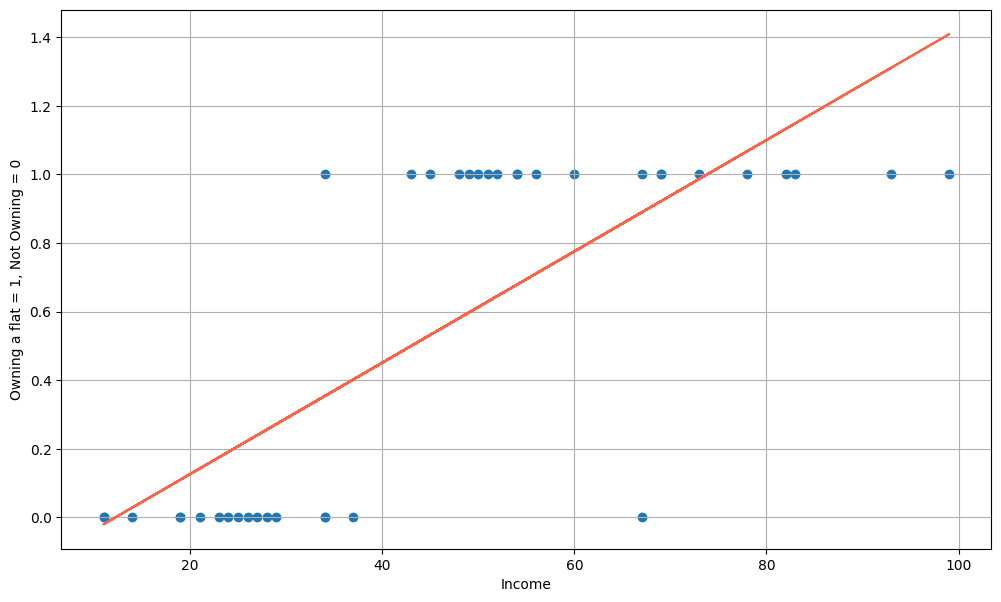

In [4]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(dados['Annual_Family_Income'], dados['Own_House'])
ax.plot(dados['Annual_Family_Income'], model.fittedvalues, color = 'tomato')
ax.grid()
ax.set_xlabel('Income')
ax.set_ylabel('Owning a flat = 1, Not Owning = 0')
plt.show()

No entanto, você pode estar questionando a validade dessa análise, especialmente porque ela assume que a relação entre renda e a probabilidade de possuir um imóvel é linear.

Essa é uma preocupação válida, pois o pressuposto de linearidade pode ser inadequado para muitos problemas econômicos. Por exemplo, embora a probabilidade de uma família possuir uma casa possa aumentar com a renda, essa relação provavelmente não é linear. Na prática, a probabilidade pode aumentar rapidamente para famílias de baixa renda, mas esse crescimento tende a desacelerar à medida que a renda aumenta, e eventualmente se estabilizar.

Considere o seguinte exemplo: Será que a probabilidade de uma família com uma renda de £10.000 e uma família com uma renda de £100.000 possuírem um imóvel deveria ser tratada da mesma maneira? O modelo de regressão linear simples prevê que a probabilidade de uma família com uma renda de £100.000 por ano possuir um imóvel seria $100 \times 0,0162 = 1,62$. Esse resultado é claramente problemático, pois uma probabilidade maior que 1 não faz sentido.

Por isso, a lógica nos impõe que as probabilidades estimadas pelo modelo devem estar restritas ao intervalo: $0 \leq E\left(Y_{i} \mid X_{i}\right) \leq 1$. Caso contrário, o modelo não estaria capturando corretamente a realidade.

Além disso, outro problema importante é que o termo de erro neste modelo depende da variável \(X\), o que implica que ele é heterocedástico por construção. Isso significa que a variância dos erros não é constante, violando uma das principais suposições do modelo de regressão linear clássico.

Para abordar esse problema de heterocedasticidade, podemos recorrer ao modelo de Mínimos Quadrados Ordinários (OLS) com erros-padrão robustos de White. Essa abordagem ajusta os erros-padrão para lidar com a heterocedasticidade, permitindo que façamos inferências mais confiáveis, mesmo quando a variância dos erros não é constante.


In [5]:
# Ajuste o modelo aos dados com erros robustos
results2 = sm.OLS(Y, X).fit(cov_type='HC2') 

# Imprima os resultados da regressão com erros robustos
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              Own_House   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     72.41
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           3.85e-10
Time:                        15:29:26   Log-Likelihood:                -10.752
No. Observations:                  38   AIC:                             25.50
Df Residuals:                      36   BIC:                             28.78
Df Model:                           1                                         
Covariance Type:                  HC2                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1981 

Ao considerar os erros heterocedásticos na análise, observamos que a constante no modelo agora pode ser considerada significativamente diferente de zero com pelo menos 10% de significância. No entanto, em termos gerais, os resultados da análise não mudaram substancialmente. Ainda assim, o modelo apresenta problemas interpretativos. Por exemplo, agora ele prevê que uma família sem renda teria uma probabilidade negativa de possuir um imóvel, o que é claramente inadequado.

Se olharmos para a previsão do modelo, ele sugere que a probabilidade de uma família com uma renda de £10.000 por ano possuir uma casa é $-0,1981 + 10 \times 0,0162 = -0,0361$. Uma probabilidade negativa não faz sentido, pois, por definição, probabilidades devem estar no intervalo de 0 a 1.

**Em resumo:**

- A suposição de distribuição Normal para os erros não se sustenta no caso do Modelo de Probabilidade Linear (LPM). Assim como $Y_{i}$, o termo de erro $u_i$ também assume dois valores devido à distribuição Bernoulli $[p, p.(1-p)]$. Como a variância dos erros é uma função da média, isso resulta em heterocedasticidade.
- A regressão OLS de $X_i$ em $Y_i$ ignora a natureza discreta da variável dependente e não impõe restrições adequadas às probabilidades previstas, permitindo que estas ultrapassem os limites [0, 1].

Dado esses problemas, precisamos de um modelo probabilístico que atenda a dois requisitos fundamentais:

1. Quando $X_i$ aumenta, a probabilidade prevista $P_i = E(Y=1|X)$ também aumenta, mas sempre permanece dentro do intervalo [0, 1].
2. A relação entre $P_i$ e $X_i$ deve ser **não linear**; por exemplo, a probabilidade $P_i$ deve se aproximar de zero a taxas cada vez menores à medida que $X_i$ diminui, e se aproximar de 1 a taxas cada vez menores à medida que $X_i$ aumenta significativamente.


### Modelo Logit

Suponha que a variável de resultado $ y $ possa assumir um dos dois valores:

$$
\begin{array}{lc} 
y = 1 & \text{com probabilidade } p \\
y = 0 & \text{com probabilidade } 1-p 
\end{array}
$$

Nosso objetivo é modelar a probabilidade $ p $ como uma função dos regressores $ x $. Inicialmente, a função de distribuição de probabilidade para a variável $ y $ é dada por:

$$
p^{y}(1-p)^{1-y}
$$

Essa expressão captura a probabilidade de observarmos o valor específico de $ y $, dado $ p $.

A esperança (média) da variável $ y $ é:

$$
E(y) = p
$$

E sua variância é:

$$
Var(y) = p(1-p)
$$

No contexto do modelo Logit, a probabilidade $ p $ é parametrizada por uma função índice $ x'\beta $, onde $ x $ é um vetor de variáveis explicativas (com dimensão $ k \times 1 $), e $ \beta $ é um vetor de parâmetros desconhecidos que queremos estimar.

O modelo Logit expressa a probabilidade condicional de $ y = 1 $ como uma função de distribuição acumulada (FDA) aplicada à função índice $ x'\beta $:

$$
p(x) = P(y=1|x) = F(x'\beta)
$$

Aqui, $ F(.) $ é uma função paramétrica específica de $ x'\beta $. Para garantir que as probabilidades $ p(x) $ estejam sempre entre 0 e 1, $ F(.) $ é escolhida como uma função de distribuição acumulada (FDA) de uma distribuição de probabilidade contínua no intervalo $ (-\infty, \infty) $.

Quando \( F(.) \) é a função de distribuição acumulada da distribuição logística $ \Lambda $, o modelo é conhecido como **Logit**. A FDA da distribuição logística é definida por:

$$
\Lambda (x'\beta) = \frac{e^{x'\beta}}{1 + e^{x'\beta}} = \frac{1}{1 + e^{-x'\beta}}
$$

Essa função tem a propriedade de mapear qualquer valor real de $ x'\beta $ para o intervalo $ (0, 1) $, o que faz dela uma escolha ideal para modelar probabilidades.

#### Efeito Marginal no Modelo Logit

O efeito marginal de uma variável explicativa $ x_j $ sobre a probabilidade $ p(x) $ é dado por:

$$
\frac{\partial p(x)}{\partial x_j} = \Lambda (x'\beta) [1 - \Lambda(x'\beta)] \cdot \beta_j
$$

Esse efeito marginal captura como uma pequena variação em $ x_j $ influencia a probabilidade de $ y = 1 $, levando em consideração a função logística.

O termo $ \Lambda (x'\beta) [1 - \Lambda(x'\beta)] $ é conhecido como a função de densidade da distribuição logística e é responsável por tornar a relação entre $ x_j $ e $ p(x) $ não linear.




#### Exemplo da Distribuição Logística

Vamos ilustrar o comportamento da função logística com um exemplo simples. Considere um modelo com uma constante (coeficiente $\beta_1$) e uma variável explicativa $X_i$ (com coeficiente $\beta_2$). Vamos assumir que \$beta_1 = 2 $ e $\beta_2 = 3$. Vamos visualizar graficamente a função logística para valores de $X_i$ no intervalo de $-3$ a $2$.

A função logística é dada por:

$$
p(x) = \frac{1}{1+e^{-(\beta_1+\beta_2X_i)}}
$$

Este modelo garante que a probabilidade $p(x)$ esteja sempre entre 0 e 1, resolvendo assim os problemas de intervalo probabilístico que observamos no Modelo de Probabilidade Linear (LPM).

A seguir, geramos a visualização gráfica dessa função:


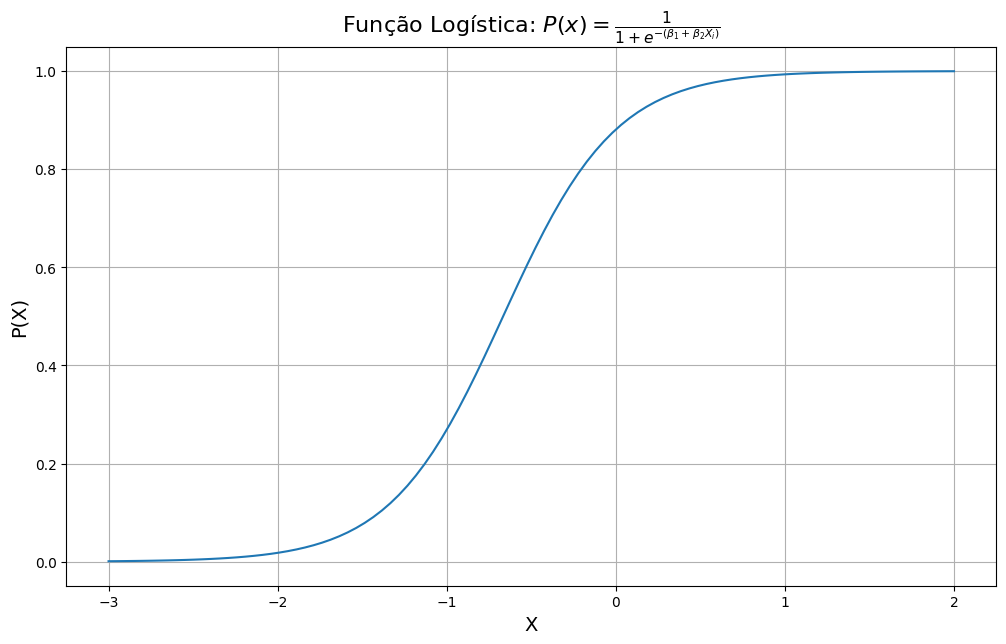

In [6]:
import numpy as np
import matplotlib.pyplot as plt

beta1, beta2 = 2, 3
X = np.linspace(-3, 2, 100)
P = 1 / (1 + np.exp(-(beta1 + beta2 * X)))

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(X, P)
ax.set_title(r'Função Logística: $P(x) = \frac{1}{1+e^{-(\beta_1+\beta_2X_i)}}$', fontsize=16)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('P(X)', fontsize=14)
ax.grid(True)
plt.show()

Esse gráfico mostra como a probabilidade $ p(x) $ se comporta conforme $ X_i $ varia. Note que a função logística gera uma curva em forma de "S", que se aproxima de 0 conforme $ X_i $ diminui, e de 1 conforme $ X_i $ aumenta, mas nunca ultrapassa esses limites.


### Linearização do Modelo Logit

Uma característica interessante do modelo Logit é que ele pode ser "linearizado", o que facilita a interpretação dos coeficientes.

Primeiro, definimos $ Z_i $ como a função índice:

$$
Z_i = \beta_1 + \beta_2X_i
$$

A função logística pode então ser expressa como:

$$
p(x) = \frac{1}{1+e^{-Z_{i}}} = \frac{e^{Z_i}}{1 + e^{Z_i}}
$$

A probabilidade de $ Y = 0 $ é:

$$
1 - p(x) = \frac{1}{1 + e^{Z_i}}
$$

Ao combinar essas expressões, obtemos a **razão de chances (odds ratio)**:

$$
\frac{p(x)}{1-p(x)} = \frac{e^{Z_i}}{1 + e^{Z_i}} \times \frac{1 + e^{Z_i}}{1} = e^{Z_i}
$$

Agora, ao aplicar o logaritmo natural na odds ratio, obtemos uma expressão linear que é conhecida como **logit**:

$$
\underbrace{\ln{\bigg(\frac{p(x)}{1-p(x)}\bigg)}}_{\text{logit}} = Z_i = \beta_1 + \beta_2X_i
$$

Essa transformação mostra que o logaritmo da odds ratio é linear em $ X_i $, o que permite uma interpretação direta dos coeficientes $\beta_1$ e $\beta_2$. Em termos práticos:

- $\beta_2$ representa a variação no logaritmo da odds ratio para um aumento unitário em $ X_i $.
- O coeficiente \(\beta_1\) é a constante que ajusta o valor base da odds ratio quando $ X_i = 0 $.

Essa propriedade torna o modelo Logit extremamente útil e interpretável em aplicações práticas, especialmente quando lidamos com variáveis dependentes binárias.


Voltemos ao nosso exemplo anterior. Assumindo o modelo não linear (Logit). Imprima os resultados da estimativa.


In [7]:
Y = dados[['Own_House']]
X = dados[['Annual_Family_Income']]
X = sm.add_constant(X)

log_reg = sm.Logit(Y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.257124
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Own_House   No. Observations:                   38
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.6261
Time:                        15:29:41   Log-Likelihood:                -9.7707
converged:                       True   LL-Null:                       -26.129
Covariance Type:            nonrobust   LLR p-value:                 1.067e-08
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.7617      2.189     -3.088      0.002     -11.053      -2.471

Ou seja, o modelo estimado foi:
$$
\hat{P_i} = \frac{1}{1+e^{6.7617-0.1678 X_i}}
$$
E a curva ajustada para os resultados encontrados é:

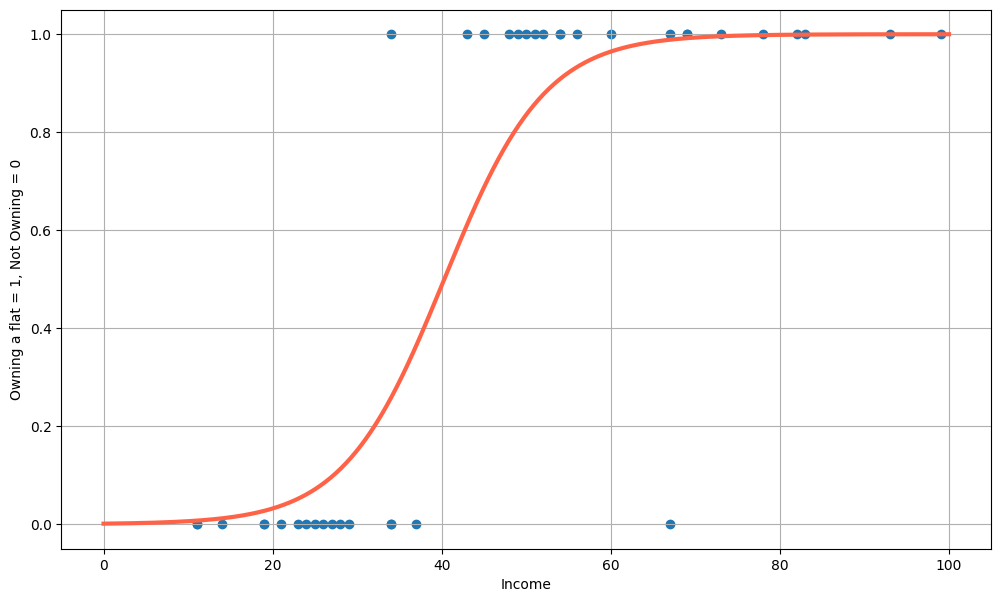

In [8]:
X = np.linspace(0, 100, 500)
P_hat = 1/(1 + np.exp(-log_reg.params[0]-log_reg.params[1]*X))

fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(dados['Annual_Family_Income'], dados['Own_House'])
ax.plot(X, P_hat, color = 'tomato', lw = 3)
ax.grid()
ax.set_xlabel('Income')
ax.set_ylabel('Owning a flat = 1, Not Owning = 0')
plt.show()

Para interpretar os coeficientes estimados, podemos calcular o efeito marginal tomando a derivada de $\beta$, neste caso $\beta_2$.
$$
\frac{dP_i}{d X_i} = \frac{dP_i}{dZ_i}\frac{dZ_i}{dX_i}=\frac{e^{-Z_i}}{(1+e^{-Z_i})^2}\beta_2
$$

**Average Marginal Effect, AME**: o efeito marginal é calculado em cada observação da amostra e, em seguida, a média desses efeitos marginais é reportada.

In [9]:
# Calcular os efeitos marginais
marginal_effects = log_reg.get_margeff()
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:              Own_House
Method:                          dydx
At:                           overall
                          dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Annual_Family_Income     0.0129      0.001     20.285      0.000       0.012       0.014


O valor de 0.0129 representa o efeito marginal da renda familiar anual sobre a probabilidade de possuir um imóvel. Em outras palavras, um aumento de uma unidade na renda familiar (por exemplo, um aumento de £1 se a unidade de medida for libras) está associado a um aumento de aproximadamente 1,29% na probabilidade de a família possuir um imóvel, mantendo todas as outras variáveis constantes.

Vamos plotar os efeitos acumulativos e marginais

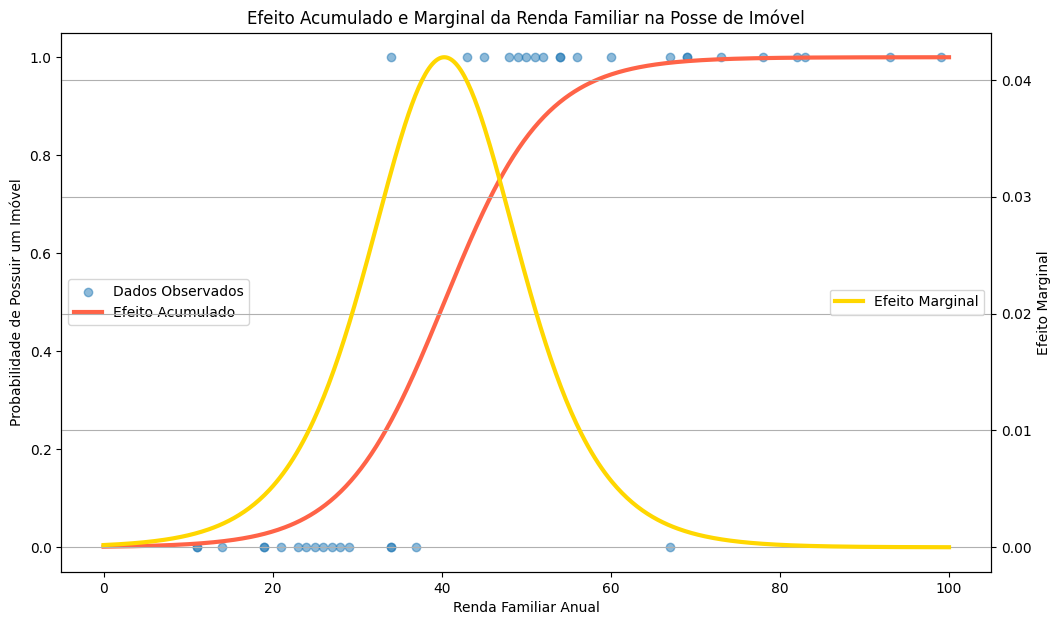

In [15]:
# Coeficientes estimados
beta1_hat, beta2_hat = log_reg.params[0], log_reg.params[1]

# Geração dos valores para o gráfico
X_values = np.linspace(0, 100, 500)
Z = beta1_hat + beta2_hat * X_values
P_hat = 1 / (1 + np.exp(-Z))  # Probabilidade acumulada
dPdX = np.exp(-Z) / (1 + np.exp(-Z))**2 * beta2_hat  # Efeito marginal

# Criação do gráfico
fig, ax1 = plt.subplots(figsize=(12, 7))

# Gráfico do efeito acumulado
ax1.scatter(dados['Annual_Family_Income'], dados['Own_House'], alpha=0.5, label='Dados Observados')
ax1.plot(X_values, P_hat, color='tomato', lw=3, label='Efeito Acumulado')
ax1.set_xlabel('Renda Familiar Anual')
ax1.set_ylabel('Probabilidade de Possuir um Imóvel')
ax1.legend(loc='center left')

# Gráfico do efeito marginal
ax2 = ax1.twinx() 
ax2.plot(X_values, dPdX, lw=3, color='gold', label='Efeito Marginal')
ax2.set_ylabel('Efeito Marginal')
ax2.legend(loc='center right')

# Título e grade
ax2.set_title('Efeito Acumulado e Marginal da Renda Familiar na Posse de Imóvel')
ax2.grid(True)

plt.show()

À medida que a renda familiar aumenta, a probabilidade marginal atingirá o máximo em torno de $ 40.000 $ libras. Para resumir o efeito, calculamos o efeito marginal **no valor médio das variáveis independentes**.

**Efeito Marginal no Valor Médio (MEM)**:  é o efeito marginal calculado no ponto onde as variáveis explicativas estão em seus valores médios.

In [16]:
# Calcular o efeito marginal no valor médio
marginal_effects_mem = log_reg.get_margeff(at='mean')
print(marginal_effects_mem.summary())


        Logit Marginal Effects       
Dep. Variable:              Own_House
Method:                          dydx
At:                              mean
                          dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Annual_Family_Income     0.0330      0.010      3.181      0.001       0.013       0.053


No ponto médio das variáveis explicativas (ou seja, considerando a renda familiar média na amostra), um aumento de £1.000 na renda familiar está associado a um aumento de 3,3% na probabilidade de uma família possuir uma casa.

#### Pseudo-$R^2$ (McFadden)

Como os modelos de regressão logística e outros modelos não lineares são estimados por **Máxima Verossimilhança**, e não pelo método dos mínimos quadrados (como no caso da regressão linear), não faz sentido relatar o $R^2$ tradicional. Em vez disso, usamos uma medida chamada **Pseudo-$R^2$**.

**Pseudo-$R^2$** compara a log-verossimilhança do modelo completo ($\ln{L}$) com a log-verossimilhança de um modelo que inclui apenas o intercepto ($\ln{L_0}$):

$$
\text{Pseudo-}R^2 = 1 - \frac{\ln{L}}{\ln{L_0}}
$$

Esse valor nos dá uma noção de quão bem o modelo se ajusta aos dados, de maneira análoga ao $R^2$ em modelos lineares.

- **$\ln{L}$** (log-verossimilhança do modelo ajustado) é similar ao **RSS** (Soma dos Quadrados dos Resíduos) no contexto de um modelo de regressão linear.
- **$\ln{L_0}$** (log-verossimilhança do modelo com apenas o intercepto) é análogo ao **TSS** (Soma Total dos Quadrados) na regressão linear.

Lembrando a fórmula do $R^2$ tradicional em OLS:

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

No caso da pseudo-$R^2$, estamos essencialmente medindo a melhoria no ajuste do modelo completo em relação ao modelo mais simples possível (com apenas o intercepto). Um pseudo-$R^2$ mais próximo de 1 indica que o modelo se ajusta melhor aos dados, embora a interpretação exata desse valor não seja tão direta quanto no caso do $R^2$ tradicional.

vejamos o resultado do Pseudo R2 para o exemplo anterior.

In [18]:
Y = dados[['Own_House']]
X = dados[['Annual_Family_Income']]
X = sm.add_constant(X)

log_reg = sm.Logit(Y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.257124
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Own_House   No. Observations:                   38
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.6261
Time:                        15:55:04   Log-Likelihood:                -9.7707
converged:                       True   LL-Null:                       -26.129
Covariance Type:            nonrobust   LLR p-value:                 1.067e-08
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.7617      2.189     -3.088      0.002     -11.053      -2.471

O equivalente ao **teste F** da regressão linear é o **teste da razão de verossimilhança (Likelihood Ratio Test - LR)**. O valor do teste da razão de verossimilhança pode ser calculado diretamente a partir dos valores da log-verossimilhança do modelo ajustado (com as variáveis explicativas) e do modelo nulo (com apenas o intercepto).

### Passos para Calcular o Teste da Razão de Verossimilhança (LR):

1. **Obtenha as log-verossimilhanças:**
   - **$\ln{L_0}$**: Log-verossimilhança do modelo nulo (modelo com apenas o intercepto). No seu resultado, isso é fornecido como `LL-Null`.
   - **$\ln{L}$**: Log-verossimilhança do modelo ajustado (com as variáveis explicativas). No seu resultado, isso é fornecido como `Log-Likelihood`.

2. **Calcule a estatística do teste da razão de verossimilhança (LR):**
   - A estatística LR é dada por:
     $$
     \text{LR} = 2 \times (\ln{L} - \ln{L_0})
     $$
   - Você pode simplesmente subtrair a log-verossimilhança do modelo nulo da log-verossimilhança do modelo ajustado e multiplicar por 2.

3. **Compare com a distribuição qui-quadrado ($\chi^2$):**
   - A estatística LR segue uma distribuição qui-quadrado ($\chi^2$) com graus de liberdade igual ao número de variáveis explicativas no modelo (neste caso, 1, porque você tem uma variável explicativa: `Annual_Family_Income`).

### Cálculo com os Resultados Fornecidos:

- **$\ln{L_0}$** (LL-Null): -26.129
- **$\ln{L}$** (Log-Likelihood): -9.7707

Agora, calcule a estatística LR:

$$
\text{LR} = 2 \times (-9.7707 - (-26.129)) = 2 \times (16.3583) = 32.7166
$$

### Interpretação:

1. **Graus de Liberdade:** O número de graus de liberdade é 1, porque você tem uma variável explicativa (`Annual_Family_Income`).

2. **Valor p:** Para determinar o valor p, você pode comparar a estatística LR com uma distribuição qui-quadrado com 1 grau de liberdade. Isso pode ser feito em Python usando a biblioteca `scipy`:

In [20]:
import scipy.stats as stats

# Calcule o valor p
p_value = stats.chi2.sf(32.7166, 1)
print(f"Valor p do teste da razão de verossimilhança: {p_value}")


Valor p do teste da razão de verossimilhança: 1.0662274421765145e-08


Dado o valor p de 1.066e-08, podemos rejeitar a hipótese nula com alto nível de confiança. Isso sugere que a variável Annual_Family_Income tem um efeito estatisticamente significativo na probabilidade de possuir uma casa. O modelo com essa variável explicativa oferece um ajuste significativamente melhor aos dados do que o modelo nulo.

#### Modelo Probit

O **modelo Probit** é uma abordagem alternativa ao modelo Logit para modelar respostas qualitativas binárias. Assim como no modelo Logit, começamos definindo uma variável latente $Z_i$:

$$
Z_i = \beta_1 + \beta_2x_2 + \dots + \beta_k x_k
$$

No modelo Probit, assumimos que a função sigmoide que mapeia $Z_i$ para uma probabilidade é a função de distribuição cumulativa normal padrão:

$$
F(z) \equiv \Phi(z) \equiv \int_{-\infty}^{z} \phi(v) \, dv
$$

Aqui, $\Phi(z)$ representa a função de distribuição cumulativa (CDF) da distribuição normal padrão, enquanto $\phi(z)$ é a função de densidade de probabilidade (PDF) da distribuição normal padrão, dada por:

$$
\phi(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2}
$$

Se $x_j$ é uma variável contínua, o efeito marginal de $x_j$ sobre a probabilidade pode ser expresso como:

$$
\frac{\partial F(z)}{\partial X_j} = \frac{dF(z)}{dZ_i} \cdot \frac{\partial Z_i}{\partial X_j} = \phi(z) \cdot \beta_j
$$

Aqui, $\phi(z)$ é a derivada da função CDF normal padrão, ou seja, a função PDF da distribuição normal padrão.

### Interpretação dos Efeitos Marginais no Modelo Probit

- **$\phi(z)$**: Esta é a função de densidade da distribuição normal padrão, que varia ao longo de $Z_i$. Diferente do modelo Logit, onde a função logística é usada, o modelo Probit assume que a distribuição dos erros segue uma normal padrão.
- **Efeito Marginal**: O efeito marginal no modelo Probit é dado por $\phi(z) \cdot \beta_j$, onde $\phi(z)$ é avaliado no valor predito de $Z_i$ para cada observação. Isso significa que o efeito marginal varia dependendo do valor de $Z_i$, ou seja, da combinação linear das variáveis explicativas.

### Exercício Prático com o Modelo Probit

Agora que entendemos a teoria, vamos praticar a aplicação do modelo Probit usando um conjunto de dados. A prática ajudará a consolidar os conceitos discutidos e permitirá explorar como o modelo Probit estima probabilidades e efeitos marginais.


In [21]:
dados = pd.read_excel(url, sheet_name = 'GMAT_Work_Quali_Resp')

Y = dados[['admitted']]
X = dados[['gmat', 'gpa', 'work_experience']]
X = sm.add_constant(X)
log_reg_house = sm.Probit(Y, X).fit()
print(log_reg_house.summary())

Optimization terminated successfully.
         Current function value: 0.243764
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   30
Model:                         Probit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.6483
Time:                        16:05:13   Log-Likelihood:                -7.3129
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 5.993e-06
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -9.5939      4.666     -2.056      0.040     -18.739      -0.448
gmat          

In [23]:
# Estimar os efeitos marginais
marginal_effects = log_reg_house.get_margeff()
print(marginal_effects.summary())

       Probit Marginal Effects       
Dep. Variable:               admitted
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gmat                0.0003      0.001      0.269      0.788      -0.002       0.003
gpa                 0.2271      0.154      1.472      0.141      -0.075       0.530
work_experience     0.0739      0.036      2.030      0.042       0.003       0.145


- **gmat:**
  - **dy/dx**: 0.0003
  - Um aumento de uma unidade na pontuação GMAT está associado a um aumento de 0,03% na probabilidade de ser admitido, mantendo as outras variáveis constantes. 

- **gpa:**
  - **dy/dx**: 0.2271
  - Um aumento de uma unidade no GPA (por exemplo, de 3.0 para 4.0) está associado a um aumento de 22,71% na probabilidade de ser admitido, mantendo as outras variáveis constantes.
  
- **work_experience:**
  - **dy/dx**: 0.0739
  - Cada ano adicional de experiência de trabalho está associado a um aumento de 7,39% na probabilidade de ser admitido, mantendo as outras variáveis constantes.


In [24]:
marginal_effects_mem = log_reg_house.get_margeff(at='mean')
print(marginal_effects_mem.summary())


       Probit Marginal Effects       
Dep. Variable:               admitted
Method:                          dydx
At:                              mean
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gmat                0.0010      0.004      0.264      0.792      -0.006       0.008
gpa                 0.6699      0.422      1.586      0.113      -0.158       1.498
work_experience     0.2180      0.119      1.832      0.067      -0.015       0.451


- **gmat:**
  - **dy/dx**: 0.0010
  - Quando as variáveis estão em seus valores médios, um aumento de uma unidade na pontuação GMAT está associado a um aumento de 0,1% na probabilidade de ser admitido.

- **gpa:**
  - **dy/dx**: 0.6699
  - Quando as variáveis estão em seus valores médios, um aumento de uma unidade no GPA (por exemplo, de 3.0 para 4.0) está associado a um aumento de 66,99% na probabilidade de ser admitido.

- **work_experience:**
  - **dy/dx**: 0.2180
  - Quando as variáveis estão em seus valores médios, um ano adicional de experiência de trabalho está associado a um aumento de 21,80% na probabilidade de ser admitido.
 

### Logit ou Probit?

Quando se trata de escolher entre os modelos **Logit** e **Probit**, é comum perceber que ambos os modelos tendem a produzir resultados semelhantes, especialmente em termos de sinais e significância dos coeficientes. No entanto, a escolha entre Logit e Probit pode depender de alguns fatores específicos do problema que você está abordando. Vamos explorar essas diferenças e considerações para ajudá-lo a decidir qual modelo pode ser preferível em diferentes contextos.

#### 1. **Distribuição dos Erros:**
   - **Logit:** Assume que os erros seguem uma distribuição logística, que tem caudas mais pesadas do que a distribuição normal. Isso significa que o modelo Logit pode ser mais robusto a valores extremos (outliers) na variável dependente.
   - **Probit:** Assume que os erros seguem uma distribuição normal padrão. O modelo Probit é particularmente útil se você acredita que o processo subjacente ao seu modelo é mais consistente com uma distribuição normal.

#### 2. **Interpretação dos Coeficientes:**
   - **Logit:** Os coeficientes do modelo Logit podem ser interpretados em termos de odds ratios, o que pode ser intuitivo em muitos contextos, especialmente na análise de risco e tomada de decisões.
   - **Probit:** Os coeficientes do modelo Probit são geralmente mais difíceis de interpretar diretamente, porque estão relacionados a uma função de distribuição acumulada normal. No entanto, os efeitos marginais calculados a partir do modelo Probit podem ser mais intuitivos.

#### 3. **Consistência dos Resultados:**
   - Na prática, os resultados de ambos os modelos são muitas vezes muito próximos, especialmente em termos de previsões de probabilidade e significância dos coeficientes. Isso ocorre porque a forma da distribuição logística e da distribuição normal padrão são semelhantes.

Em muitos casos, a escolha entre Logit e Probit pode ser feita com base na preferência pela interpretação dos coeficientes ou em convenções do campo de estudo. Ambos os modelos são sólidos e oferecem previsões robustas, mas o **Logit** pode ser ligeiramente mais preferido em aplicações práticas devido à facilidade de interpretação dos odds ratios. **Probit**, por outro lado, é frequentemente preferido em modelos econométricos, onde a normalidade dos erros é assumida.



### Relação entre os Modelos Logit e Probit

Os modelos **Logit** e **Probit** são bastante semelhantes porque ambos modelam a probabilidade de um evento binário, mas usando diferentes distribuições subjacentes (logística para o Logit e normal padrão para o Probit). 

Visualmente, também podemos ver a diferença, que o logit é mais plano que o probit. 

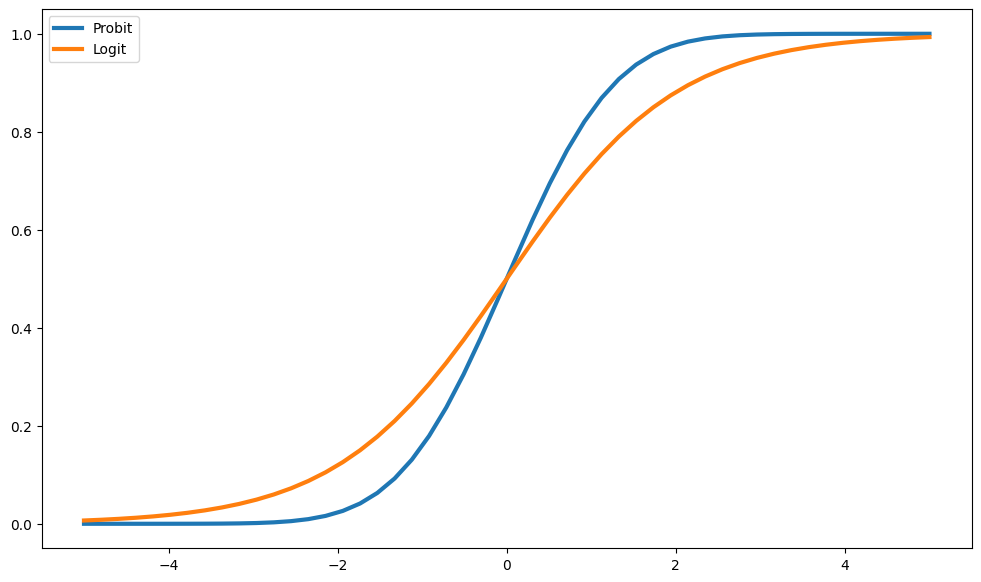

In [75]:
Z = np.linspace(-5, 5)
Y_probit = sp.stats.norm.cdf(Z, loc = 0, scale = 1)
Y_logit = 1/(1+np.exp(-Z))
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(Z, Y_probit, lw =3, label = 'Probit')
ax.plot(Z, Y_logit, lw = 3, label = 'Logit')
ax.legend()
plt.show()

#### Escala dos Coeficientes

- **Coeficientes Logit e Probit:** A relação entre os coeficientes estimados pelo modelo Logit e Probit é aproximadamente constante. O coeficiente de um modelo Logit é geralmente cerca de **1.6** vezes maior que o coeficiente correspondente do modelo Probit. Isso ocorre porque a distribuição logística usada no Logit tem uma variação maior que a distribuição normal padrão usada no Probit.
  
  - **1.6** é aproximadamente **$\frac{\pi}{\sqrt{3}}$**, que é a razão entre as variâncias das distribuições logística e normal padrão.
  
- **Comparação direta:** Para fazer uma comparação direta entre os coeficientes dos dois modelos, você pode usar o fator de conversão **0.625** (que é aproximadamente **$\frac{1}{1.6}$** ou **$\frac{\sqrt{3}}{\pi}$**). Portanto, ao multiplicar os coeficientes do Logit por **0.625**, você obtém coeficientes que são aproximadamente comparáveis aos do Probit.

#### Comparação com o Modelo de Probabilidade Linear (MPL)

- **Coeficientes do Logit:** Para comparar os coeficientes do Logit com os do **Modelo de Probabilidade Linear (MPL)**, uma regra prática é dividir os coeficientes do Logit por **4**.
  
- **Coeficientes do Probit:** Para comparar os coeficientes do Probit com os do MPL, você pode dividir os coeficientes do Probit por **2.5**. Isso ocorre porque os efeitos marginais nos modelos Logit e Probit são aproximadamente equivalentes ao multiplicar os coeficientes por esses fatores.


Essas relações funcionam porque, apesar das distribuições subjacentes diferentes, as formas das curvas sigmoides do Logit e do Probit são muito semelhantes. A diferença é essencialmente uma questão de escala devido à diferença nas variâncias das distribuições subjacentes.


### Modelo de Resposta Multinomial

Agora vamos considerar uma variável dependente que pode assumir múltiplas categorias como resultado. Esses dados categóricos são aqueles em que a variável dependente recai em categorias mutuamente exclusivas.

**Exemplos:**
- Formas de ir à faculdade (a pé, de carro, de ônibus, de bicicleta).
- Categorias de “status” de saúde (péssimo, ruim, médio, bom, excelente).

Existem diversos modelos de probabilidade para lidar com distribuições multinomiais, e a escolha do modelo adequado depende de se as categorias são ordenadas ou não.

#### Modelo Multinomial (Não Ordenado)

O modelo multinomial é usado quando a variável dependente pode assumir mais de duas categorias não ordenadas. 

**Exemplo:** Suponha que estamos modelando a escolha do meio de transporte de um grupo de pessoas. As categorias possíveis são: andar, dirigir, pegar o ônibus, ou andar de bicicleta.

Considere que o resultado $y_i$ para o indivíduo $i$ é uma das $m$ alternativas. Especificamente, $y_i = j$ se o resultado é a $j$-ésima alternativa, onde $j = 1, 2, \ldots, m$. Os valores numéricos atribuídos às alternativas ($1, 2, \ldots, m$) são arbitrários, e o ordenamento dessas categorias não tem importância, a menos que estejamos considerando um modelo ordenado.

A probabilidade de que o resultado para o indivíduo $i$ seja a alternativa $j$, dado os regressores $x_i$, é dada por:

$$
p_{ij} \equiv \Pr(y_i = j) = F_i(x_i, \theta), \quad j = 1, 2, \ldots, m; \quad i = 1, \ldots, N
$$

#### Normalização e Interpretação dos Parâmetros

Os modelos multinomiais requerem normalização porque, sem ela, os parâmetros estimados não são identificáveis. Normalmente, uma das categorias é escolhida como a categoria de referência, e as probabilidades das outras categorias são estimadas em relação a essa categoria. Isso significa que os parâmetros associados às categorias não são diretamente interpretáveis, nem mesmo o sinal dos coeficientes.

Por isso, é **essencial** calcular os **efeitos marginais** (ME) para interpretar corretamente os resultados.

Para um indivíduo $i$, o efeito marginal (ME) de uma mudança no $k$-ésimo regressor sobre a probabilidade de que a alternativa $j$ seja escolhida é dado por:

$$
ME_{ijk} = \frac{\partial \Pr(y_i = j)}{\partial x_{ik}} = \frac{\partial F_j(x_i, \theta)}{\partial x_{ik}}
$$

Cada regressor terá um efeito marginal correspondente para cada uma das $m$ categorias, e a soma desses efeitos marginais sobre todas as categorias será zero, pois as probabilidades somam a um.

**Exemplo Prático:**
Imagine um modelo que estima as probabilidades de escolha entre diferentes meios de transporte (andar, dirigir, pegar o ônibus, ou andar de bicicleta) com base em variáveis como distância, tempo de viagem, e custo. Os efeitos marginais nos diriam como uma mudança na distância, por exemplo, altera a probabilidade de escolher cada meio de transporte.

In [33]:
import pandas as pd
import statsmodels.api as sm

# Carregar os dados
df2 = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/sysdsn3.dta")

In [37]:
# Definir as variáveis de interesse
X = df2[['age', 'male', 'nonwhite', 'site2', 'site3']]
y = df2['insure']

# Concatenar X e y em um único DataFrame para dropar as linhas com missing
data = pd.concat([X, y], axis=1)

# Dropar as linhas onde qualquer variável é "missing"
data_clean = data.dropna()

# Separar novamente X e y após a limpeza
X_clean = data_clean[['age', 'male', 'nonwhite', 'site2', 'site3']]
y_clean = data_clean['insure']

# Adicionar a constante ao modelo
X_clean = sm.add_constant(X_clean)

# Estimar o modelo multinomial logit
mlogit_model = sm.MNLogit(y_clean, X_clean).fit()

# Exibir o resumo do modelo
print(mlogit_model.summary())


Optimization terminated successfully.
         Current function value: 0.868881
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                 insure   No. Observations:                  615
Model:                        MNLogit   Df Residuals:                      603
Method:                           MLE   Df Model:                           10
Date:                seg, 12 ago 2024   Pseudo R-squ.:                 0.03867
Time:                        17:20:27   Log-Likelihood:                -534.36
converged:                       True   LL-Null:                       -555.85
Covariance Type:            nonrobust   LLR p-value:                 5.003e-06
 insure=Prepaid       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2697      0.328      0.821      0.412      -0.374       0.913
age           

In [38]:
# Calcular os efeitos marginais
marginal_effects = mlogit_model.get_margeff()

# Exibir o resumo dos efeitos marginais
print(marginal_effects.summary())


       MNLogit Marginal Effects      
Dep. Variable:                 insure
Method:                          dydx
At:                           overall
insure=Indemnity      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0027      0.001      1.905      0.057   -7.65e-05       0.005
male                -0.1303      0.046     -2.862      0.004      -0.219      -0.041
nonwhite            -0.2061      0.052     -3.965      0.000      -0.308      -0.104
site2                0.0197      0.049      0.403      0.687      -0.076       0.116
site3                0.1270      0.051      2.511      0.012       0.028       0.226
------------------------------------------------------------------------------------
insure=Prepaid      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ag

In [39]:
# Calcular os efeitos marginais na média das variáveis explicativas
marginal_effects_mem = mlogit_model.get_margeff(at='mean')

# Exibir o resumo dos efeitos marginais na média
print(marginal_effects_mem.summary())


       MNLogit Marginal Effects      
Dep. Variable:                 insure
Method:                          dydx
At:                              mean
insure=Indemnity      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0028      0.001      1.895      0.058   -9.61e-05       0.006
male                -0.1368      0.049     -2.801      0.005      -0.232      -0.041
nonwhite            -0.2194      0.057     -3.850      0.000      -0.331      -0.108
site2                0.0137      0.051      0.270      0.787      -0.086       0.113
site3                0.1348      0.054      2.491      0.013       0.029       0.241
------------------------------------------------------------------------------------
insure=Prepaid      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ag

AME vs. MEM: Ambos os métodos fornecem resultados muito semelhantes, o que indica que o modelo é estável e as variáveis explicativas têm impactos consistentes em todas as observações, bem como na "observação média". O MEM fornece uma visão sobre uma "observação típica", enquanto o AME fornece uma visão geral de como as variáveis influenciam em toda a amostra.

### Modelos Ordenados

Quando as categorias da variável dependente possuem uma ordem natural, devemos considerar essa ordenação no modelo. 

**Exemplo:** Suponha que estamos modelando o status de saúde de indivíduos, onde as categorias são: péssimo, ruim, médio, bom, excelente.

Nesse caso, a variável precisa ser tratada de forma que as categorias cresçam sequencialmente, refletindo uma variável latente $y^*$, que cruza progressivamente níveis superiores à medida que a saúde melhora. Para o indivíduo $i$, especificamos:

$$
y^* = x_i' \beta + u_i
$$

Aqui, $y^*$ é uma variável latente contínua que determina o estado de saúde observado.

#### Interpretação dos Limiares

O modelo ordenado supõe que existem limiares $\alpha_j$ que separam as diferentes categorias observadas de $y_i$. Se o valor de $y^*$ para o indivíduo $i$ estiver entre dois limiares, a categoria correspondente é escolhida.

Para um modelo ordenado com $m$ categorias, definimos:

$$
y_i = j \quad \text{se} \quad \alpha_{j-1} < y_i^* \leq \alpha_j, \quad j = 1, \ldots, m
$$

Aqui, $\alpha_0 = -\infty$ e $\alpha_m = \infty$. Então, a probabilidade de que o indivíduo $i$ caia na categoria $j$ é:

$$
\Pr(y_i = j) = \Pr(\alpha_{j-1} < y_i^* \leq \alpha_j)
$$

Substituindo $y^*$ pela sua expressão:

$$
\Pr(\alpha_{j-1} < x_i' \beta + u_i \leq \alpha_j) = F(\alpha_{j-1} - x_i' \beta) - F(\alpha_j - x_i' \beta)
$$

Onde $F(\cdot)$ é a função de distribuição acumulada do erro $u_i$. Nesse modelo, os sinais dos coeficientes $\beta$ podem ser interpretados diretamente: um $\beta_k$ positivo indica que um aumento na variável $x_{ik}$ aumenta a probabilidade de estar em uma categoria superior.

**Exemplo Prático:**
Considere um modelo que avalia o efeito da idade, renda, e estilo de vida sobre o status de saúde (péssimo, ruim, médio, bom, excelente). Um coeficiente $\beta_k$ positivo para a renda indicaria que indivíduos com renda mais alta têm maior probabilidade de estar em melhores categorias de saúde.


Vamos assumir que a ordem importa: Uninsure < Prepaid < Indemnity

In [71]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Carregar os dados
df2 = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/sysdsn3.dta")

In [72]:
# Assumir que a variável dependente 'insure' está codificada como: Uninsure=0, Prepaid=1, Indemnity=2
df2['insure'] = pd.Categorical(df2['insure'], categories=['Prepaid', 'Indemnity', 'Uninsure',], ordered=True)
df2['insure'] = df2['insure'].cat.codes

# Definir as variáveis de interesse
X = df2[['age', 'male', 'nonwhite', 'site2', 'site3']]
y = df2['insure']

# Concatenar X e y para limpeza
data = pd.concat([X, y], axis=1)

# Remover linhas com NaN ou Inf
data_clean = data.replace([np.inf, -np.inf], np.nan).dropna()

# Separar novamente X e y após a limpeza
X_clean = data_clean[['age', 'male', 'nonwhite', 'site2', 'site3']]
y_clean = data_clean['insure']

# Ajustar o modelo ordenado (Ordered Logit) sem adicionar a constante
ordered_model = OrderedModel(y_clean, X_clean, distr='logit')
ordered_result = ordered_model.fit()

# Exibir o resumo do modelo
print(ordered_result.summary())


                             OrderedModel Results                             
Dep. Variable:                 insure   Log-Likelihood:                -664.41
Model:                   OrderedModel   AIC:                             1345.
Method:            Maximum Likelihood   BIC:                             1381.
Date:                seg, 12 ago 2024                                         
Time:                        17:55:31                                         
No. Observations:                 643                                         
Df Residuals:                     635                                         
Df Model:                           8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0082      0.005      1.516      0.130      -0.002       0.019
male          -0.0059      0.177     -0.033      0.9

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\optimizer.py:728: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
import numpy as np

# Obter os coeficientes das variáveis explicativas
coef = ordered_result.params[:-2]  # Excluindo os cut points

# Adicionar uma constante na matriz X_clean
X_clean_const = sm.add_constant(X_clean)

# Calcular as probabilidades previstas para as médias das variáveis explicativas
X_mean = X_clean_const.mean(axis=0).values.reshape(1, -1)
Z_mean = np.dot(X_mean, coef)

# Calcular as probabilidades previstas para cada limiar (cut point)
cut_points = ordered_result.params[-2:]
probs_mean = np.array([
    ordered_result.model.cdf(cut_points[0] - Z_mean),
    ordered_result.model.cdf(cut_points[1] - Z_mean)
])

# Calcular as probabilidades para cada categoria (3 categorias no total)
P1_mean = probs_mean[0]
P2_mean = probs_mean[1] - probs_mean[0]
P3_mean = 1 - probs_mean[1]

# Mostrar as probabilidades médias
print("Probabilidade média de Uninsure:", P1_mean)
print("Probabilidade média de Prepaid:", P2_mean)
print("Probabilidade média de Indemnity:", P3_mean)

# Calcular os efeitos marginais na média
effects_at_mean = []

delta = 1e-5
for i in range(X_clean_const.shape[1]):
    X_high = X_mean.copy()
    X_low = X_mean.copy()
    
    X_high[0, i] += delta
    X_low[0, i] -= delta
    
    Z_high = np.dot(X_high, coef)
    Z_low = np.dot(X_low, coef)
    
    probs_high = np.array([
        ordered_result.model.cdf(cut_points[0] - Z_high),
        ordered_result.model.cdf(cut_points[1] - Z_high)
    ])
    
    probs_low = np.array([
        ordered_result.model.cdf(cut_points[0] - Z_low),
        ordered_result.model.cdf(cut_points[1] - Z_low)
    ])
    
    P1_high = probs_high[0]
    P2_high = probs_high[1] - probs_high[0]
    P3_high = 1 - probs_high[1]
    
    P1_low = probs_low[0]
    P2_low = probs_low[1] - probs_low[0]
    P3_low = 1 - probs_low[1]
    
    # Efeitos marginais para cada categoria
    marginal_effect_P1 = (P1_high - P1_low) / (2 * delta)
    marginal_effect_P2 = (P2_high - P2_low) / (2 * delta)
    marginal_effect_P3 = (P3_high - P3_low) / (2 * delta)
    
    effects_at_mean.append([marginal_effect_P1[0], marginal_effect_P2[0], marginal_effect_P3[0]])

effects_at_mean = np.array(effects_at_mean)

# Mostrar os efeitos marginais na média para cada categoria
print("Efeitos Marginais na Média:")
print("Categoria Uninsure:", effects_at_mean[:, 0])
print("Categoria Prepaid:", effects_at_mean[:, 1])
print("Categoria Indemnity:", effects_at_mean[:, 2])



Probabilidade média de Uninsure: [0.99996395]
Probabilidade média de Prepaid: [1.86293802e-05]
Probabilidade média de Indemnity: [1.74196827e-05]
Efeitos Marginais na Média:
Categoria Uninsure: [-3.21376259e-07  7.71467334e-06 -3.27873284e-06 -1.52759916e-05
 -4.55241955e-06  9.33785882e-05]
Categoria Prepaid: [ 1.66072711e-07 -3.98670541e-06  1.69435577e-06  7.89416310e-06
  2.35255704e-06 -4.82551998e-05]
Categoria Indemnity: [ 1.55303548e-07 -3.72796793e-06  1.58437707e-06  7.38182848e-06
  2.19986251e-06 -4.51233884e-05]


### Considerações

**Angrist and Pischke (2008, pg.70):**

**“O fato de uma variável dependente ser limitada deve afetar a prática empírica?”**

*Muitos livros de econometria argumentam que sim quanto aplica-se OLS para variáveis dependentes contínuas. Entretanto quando o resultado de interesse for uma variável dependente limitada (limited dependente variable - LDV), os modelos de regressão linear seriam inadequados e os modelos não lineares, de modo que modelos Probit e Tobit seriam preferidos.*

*Em contraste, a visão de regressão como **herdando sua legitimidade da função de expectativa condicional** (Conditional Expectation Function – CEF) faz com que a LDV pareça menos central.*


**Ou seja, Angrist and Pischke argumentam que a justificativa para o uso de modelos não lineares para LDV é fraca**. Principalmente se o foco for identificação causal. Certo; talvez a LDV não é central para a identificação causal de forma direta (vamos entender isso na segunda parte do curso); **Mas é importante que nós conheçamos esses métodos** porque eles são utilizados tanto como possíveis **estratégias de robustez**, quanto como **passos intermediários** para construção de novas estratégias mais robustas.